<a href="https://colab.research.google.com/github/RubaAlshamrani/CS392-F22-HW4/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

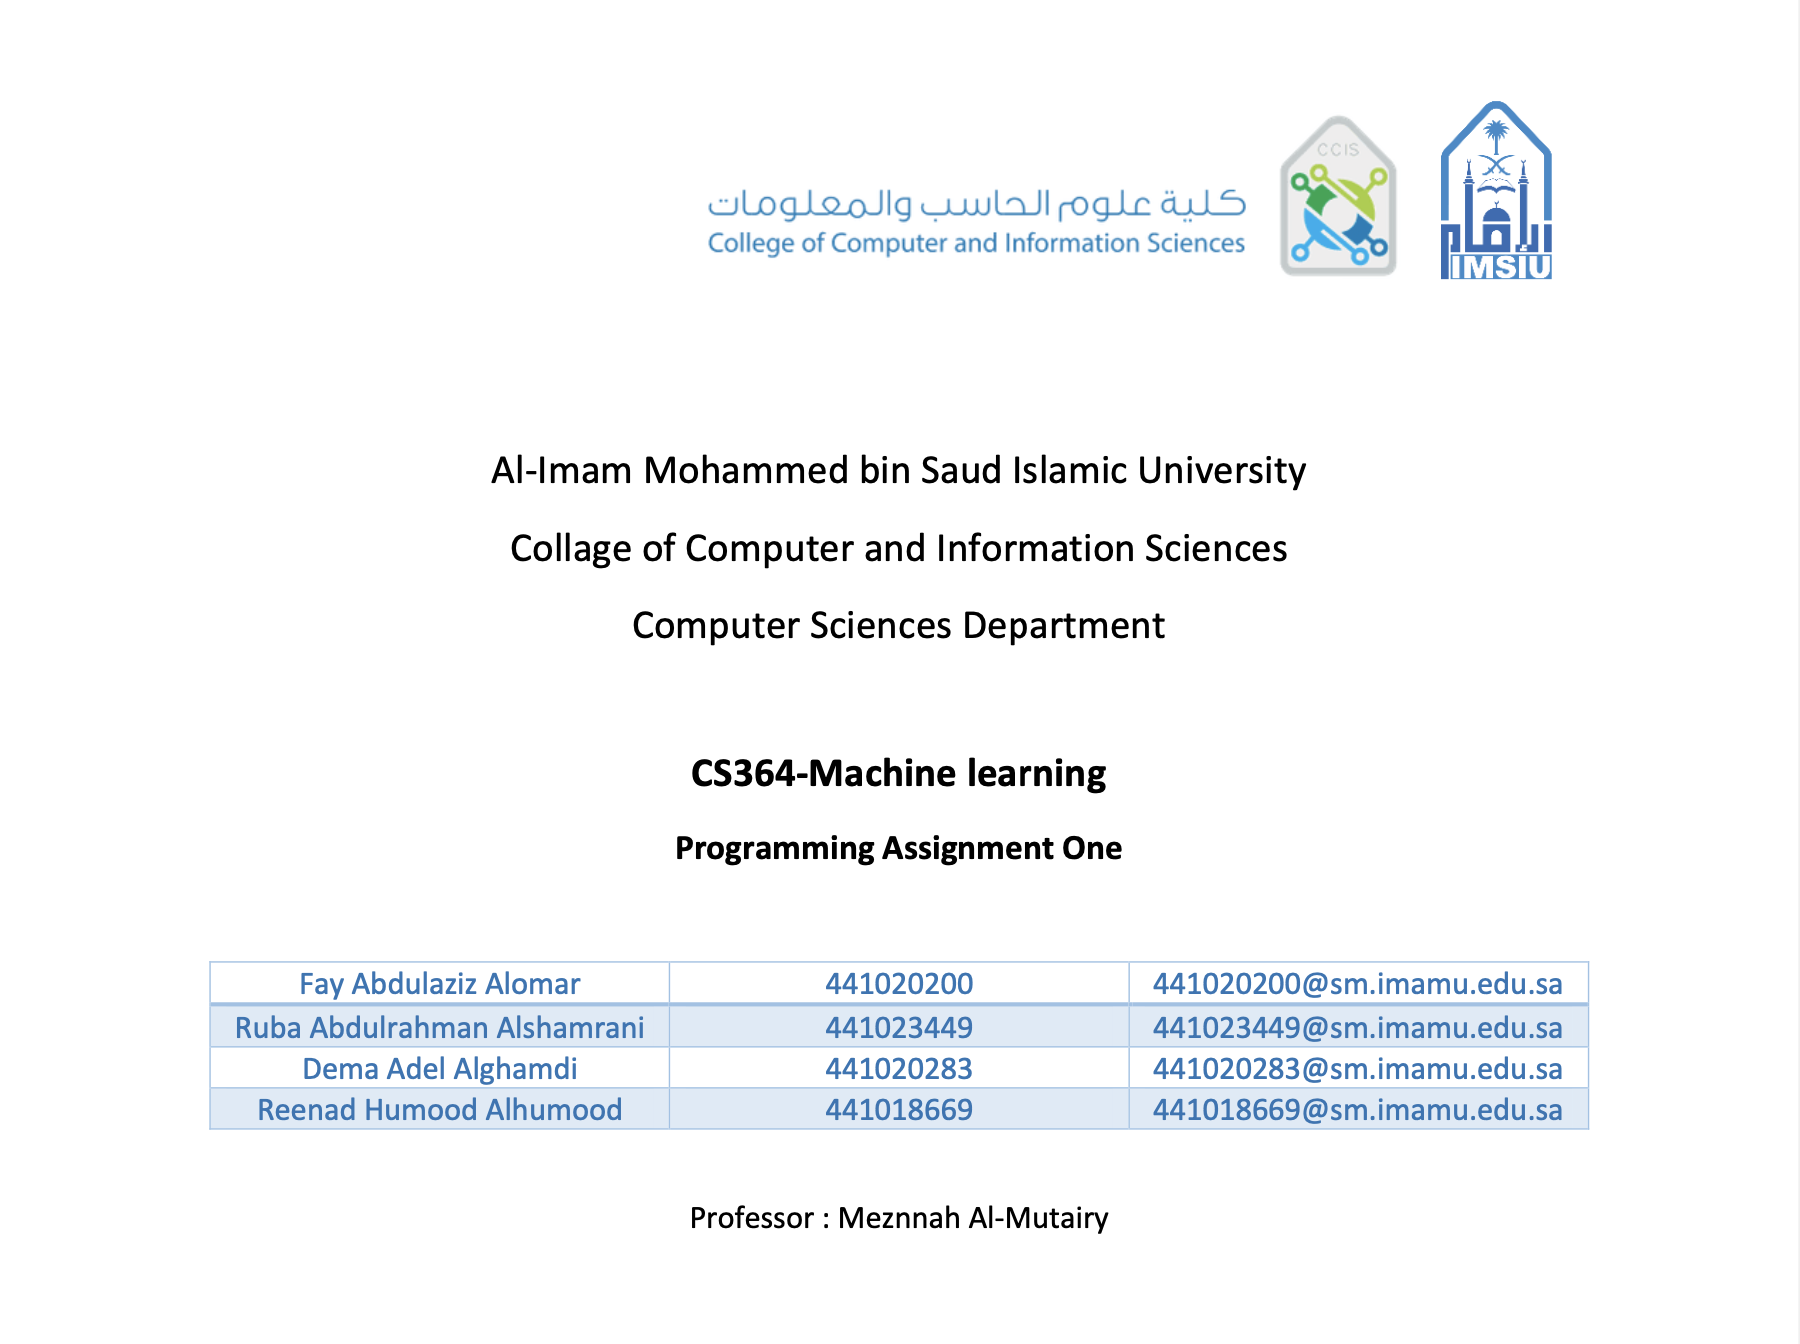

# FILES .CSV

In [ ]:
from google.colab import files
uploaded = files.upload()

#**2.4** Exercises

##8.



(a) Use the pd.read_csv() function to read the data into Python. Call
the loaded data college. Make sure that you have the directory
set to the correct location for the data.

ANSWER :

In [ ]:
import pandas as pd
college = pd.read_csv("/content/College.csv")
print(college)

FileNotFoundError: ignored

(b) Look at the data used in the notebook by creating and running
a new cell with just the code college in it. You should notice
that the frst column is just the name of each university in a
column named something like Unnamed: 0. We don’t really want
pandas to treat this as data. However, it may be handy to have
these names for later. Try the following commands and similarly
look at the resulting data frames:



In [ ]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
college3 = college3.set_index('College')

This has used the frst column in the fle as an index for the
data frame. This means that pandas has given each row a name
corresponding to the appropriate university. Now you should see
that the frst data column is Private. Note that the names of
the colleges appear on the left of the table. We also introduced
a new python object above: a dictionary, which is specifed by dictionary (key, value) pairs. Keep your modifed version of the data with
the following:

In [ ]:
college = college3

ANSWER :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv("/content/College.csv")
college2 = pd.read_csv('/content/College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college = college3
print(college)

                               Private   Apps  Accept  Enroll  Top10perc  \
College                                                                    
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

           

(c) Use the describe() method of to produce a numerical summary
of the variables in the data set.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv("/content/College.csv")
print(college.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

(d) Use the pd.plotting.scatter_matrix() function to produce a
scatterplot matrix of the frst columns [Top10perc, Apps, Enroll].
Recall that you can reference a list C of columns of a data frame
A using A[C].

ANSWER :

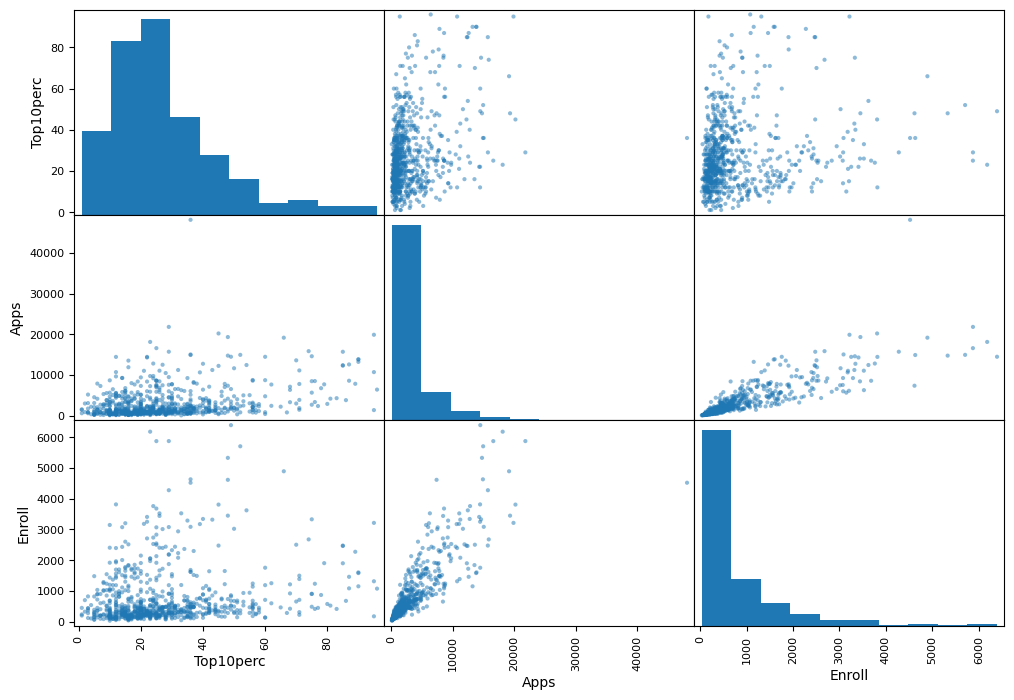

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv("/content/College.csv")
thesubcol = college[['Top10perc', 'Apps', 'Enroll']]
pd.plotting.scatter_matrix(thesubcol, figsize=(12, 8))
plt.show()

(e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

ANSWER :

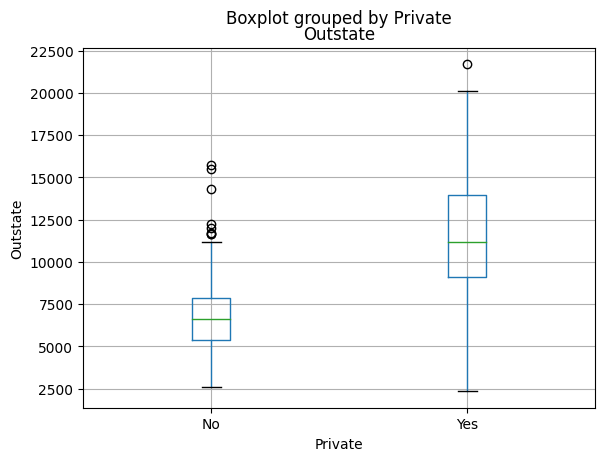

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv("/content/College.csv")
college.boxplot(column='Outstate', by='Private')
plt.xlabel('Private')
plt.ylabel('Outstate')
plt.show()

(f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.


In [ ]:
college['Elite'] = pd.cut(college['Top10perc'],
[0,0.5,1],
labels=['No', 'Yes'])

Use the value_counts() method of college['Elite'] to see how
many elite universities there are. Finally, use the boxplot() method
again to produce side-by-side boxplots of Outstate versus Elite.

ANSWER :

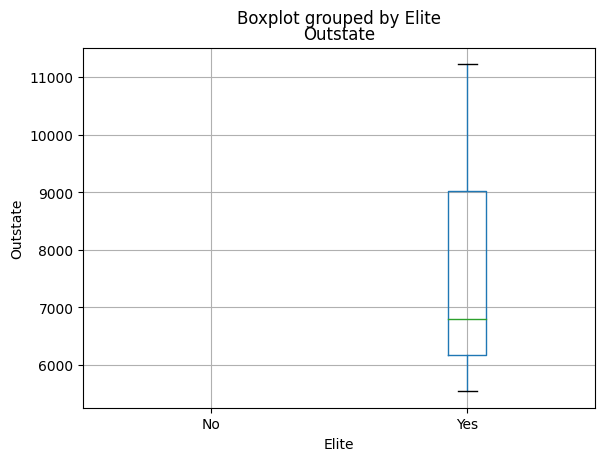

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv("/content/College.csv")
college['Elite'] = pd.cut(college['Top10perc'],[0,0.5,1],labels=['No', 'Yes'])
countelite = college['Elite'].value_counts()
college.boxplot(column='Outstate', by='Elite')
plt.ylabel('Outstate')
plt.xlabel('Elite')
plt.show()

(g) Use the plot.hist() method of college to produce some histograms with difering numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

ANSWER :

Text(0.5, 0.98, 'Histograms of number of applicants by schools type')

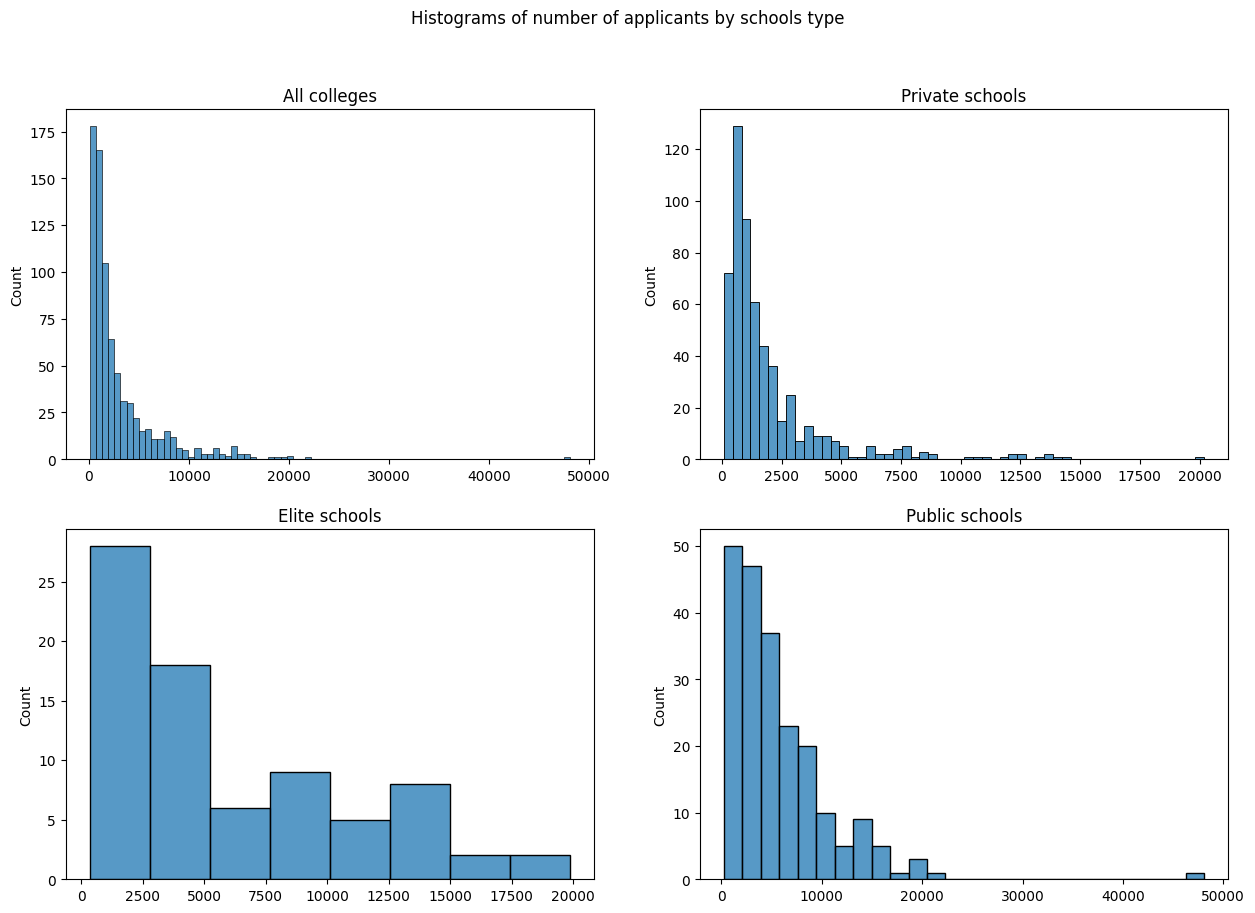

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

college = pd.read_csv("/content/College.csv")

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

sns.histplot(college["Apps"], kde = False ,ax = axes[0, 0])
axes[0, 0].set(xlabel = "",title = "All colleges")

sns.histplot(college.loc[college["Private"]== "Yes", "Apps"], kde = False ,ax = axes[0, 1])
axes[0, 1].set(xlabel = "",title = "Private schools")

college.loc[college['Top10perc'] > 50, 'Elite'] = 'Yes'
college['Elite'] = pd.Categorical(college['Elite'])
sns.histplot(college.loc[college["Elite"]== "Yes", "Apps"], kde = False ,ax = axes[1, 0])
axes[1, 0].set(xlabel = "",title = "Elite schools")

sns.histplot(college.loc[college["Private"]== "No", "Apps"], kde = False ,ax = axes[1, 1])
axes[1, 1].set(xlabel = "",title = "Public schools")

fig.suptitle('Histograms of number of applicants by schools type')



(h) Continue exploring the data, and provide a brief summary of
what you discover.

ANSWER :

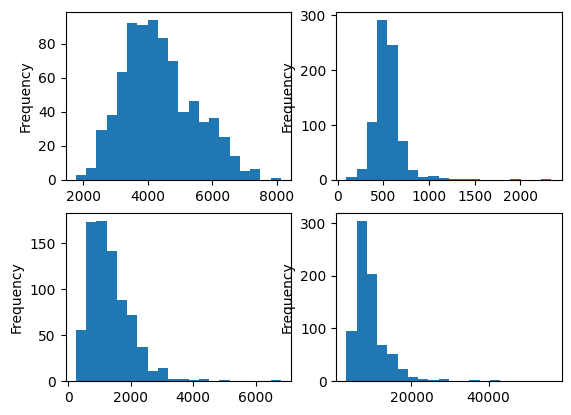

No     699
Yes     78
Name: Elite, dtype: int64


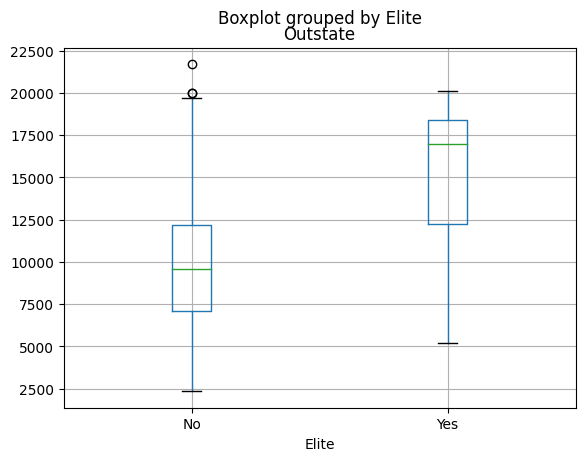

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv('/content/College.csv')

fig, axes = plt.subplots(2, 2)
college['Room.Board'].plot.hist(ax=axes[0, 0], bins=20)
college['Books'].plot.hist(ax=axes[0, 1], bins=20)
college['Personal'].plot.hist(ax=axes[1, 0], bins=20)
college['Expend'].plot.hist(ax=axes[1, 1], bins=20)
plt.show()

college['Elite'] = pd.cut(college['Top10perc'], [0, 50, 100], labels=['No', 'Yes'])
elite_counts = college['Elite'].value_counts()
print(elite_counts)

college.boxplot(column='Outstate', by='Elite')
plt.show()

summary_stats = college.describe()
print(summary_stats)

College dataset:

1. Variable Distribution: The histograms show the distributions of various variables, including "Room.Board," "Books," "Personal," and "Expend."



2. Variable Relationships: The scatterplot matrix makes it easier to see the connections between "Top10perc," "Apps," and "Enroll."



3. Private vs. Public Institutions: Boxplots that contrast "Outstate" between private and public institutions show that out-of-state tuition costs vary.



4. Elite Universities: The number of elite universities is determined by binning the "Top10perc" variable, which creates the "Elite" variable.



5. Statistical Analysis: Summary statistics, which include measures like mean, standard deviation, minimum, maximum, and quartiles, give an overview of the dataset.

##9


a)

Which of the predictors are quantitative, and which are quali- tative?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

auto = pd.read_csv('/content/Auto.csv', na_values = ['?'])
auto.dropna(inplace = True)
auto.shape


(392, 9)

ANSWER :

quntitative data is numbers-based, countable and measurable (weight, displacement,mpg, horsepower, acceleration, year, cylinder engine )
Qualitative data is descriptive , relate to language, interruption based.( origin, name)

b)

What is the range of each quantitative predictor? You can an- swer this using the min() and max() methods in numpy.

ANSWER :


In [ ]:
auto_max = auto.loc[:, 'mpg':'year'].max(axis= 0)
auto_min = auto.loc[:, 'mpg':'year'].min(axis= 0)
auto_range = auto_max - auto_min

pd.DataFrame({'max':auto_max, 'min':auto_min, 'range':auto_range})

,max,min,range
mpg,46.6,9.0,37.6
cylinders,8.0,3.0,5.0
displacement,455.0,68.0,387.0
horsepower,230.0,46.0,184.0
weight,5140.0,1613.0,3527.0
acceleration,24.8,8.0,16.8
year,82.0,70.0,12.0


c)

What is the mean and standard deviation of each quantitative predictor?

ANSWER :

In [ ]:
auto_mean = auto.loc[:, 'mpg':'year'].mean(axis = 0)
auto_sd = auto.loc[:, 'mpg':'year'].std(axis = 0)
pd.DataFrame({'mean':auto_mean, 'standered deviation ':auto_sd})

,mean,standered deviation
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


d)

Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

ANSWER :

In [ ]:
auto.reset_index(drop = True, inplace = True)
auto_dropped = auto.drop(index = list(range(9, 85)))
dropped_max = auto_dropped.loc[:, 'mpg':'year'].max(axis = 0)
dropped_min = auto_dropped.loc[:, 'mpg':'year'].min(axis = 0)
dropped_range = dropped_max - dropped_min
dropped_mean = auto_dropped.loc[:, 'mpg':'year'].mean(axis = 0)
dropped_sd = auto_dropped.loc[:, 'mpg':'year'].std(axis = 0)

pd.DataFrame({'max':dropped_max, 'min':dropped_min, 'range':dropped_range, 'mean':dropped_mean, 'standered deviation':dropped_sd})


,max,min,range,mean,standered deviation
mpg,46.6,11.0,35.6,24.404430,7.867283
cylinders,8.0,3.0,5.0,5.373418,1.654179
displacement,455.0,68.0,387.0,187.240506,99.678367
horsepower,230.0,46.0,184.0,100.721519,35.708853
weight,4997.0,1649.0,3348.0,2935.971519,811.300208
acceleration,24.8,8.5,16.3,15.726899,2.693721
year,82.0,70.0,12.0,77.145570,3.106217


e)

Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

ANSWER :

In [ ]:
origin_dict = {1: "American", 2: "European", 3: "Japanese"}
auto["origin"] = auto["origin"].transform(lambda x: origin_dict[x]).astype('category')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


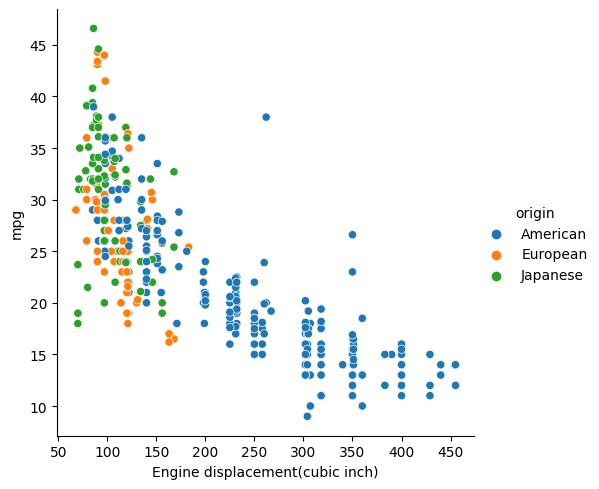

In [ ]:
g = sns.relplot(x = "displacement", y = 'mpg', hue = 'origin', data = auto)
g.set(xlabel = "Engine displacement(cubic inch)")
plt.show()

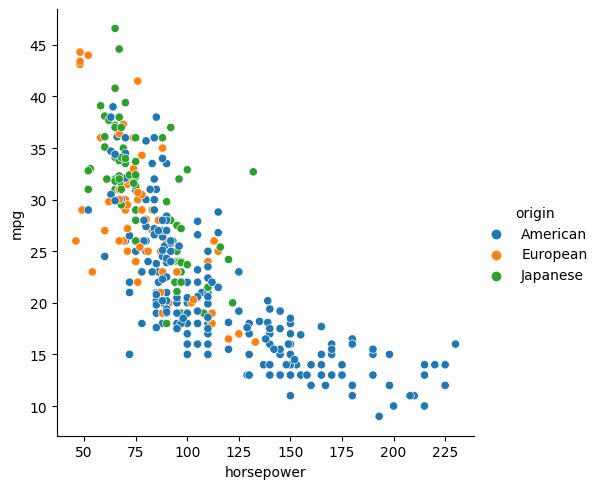

In [ ]:
g = sns.relplot(x = "horsepower", y = 'mpg', hue = 'origin', data = auto)
plt.show()

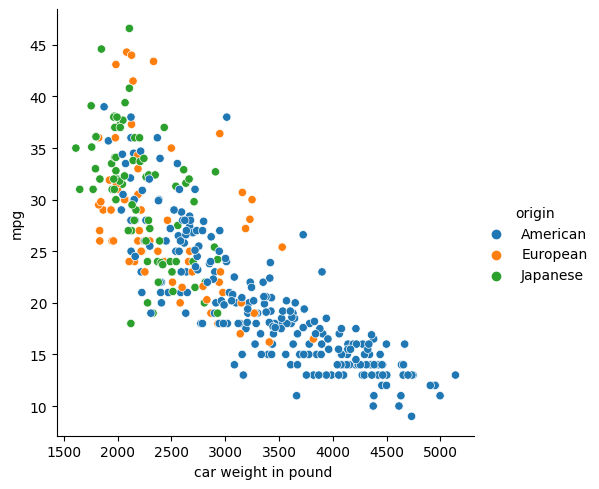

In [ ]:
g = sns.relplot(x = "weight", y = 'mpg', hue = 'origin', data = auto)
g.set(xlabel = "car weight in pound ")
plt.show()

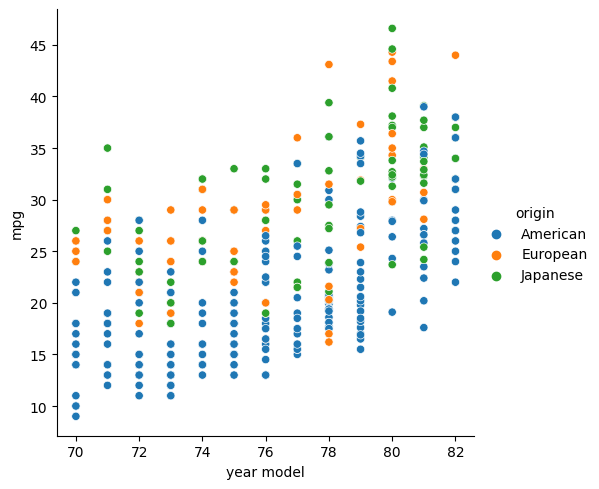

In [ ]:
g = sns.relplot(x = "year", y = 'mpg', hue = 'origin', data = auto)
g.set(xlabel = "year model")
plt.show()

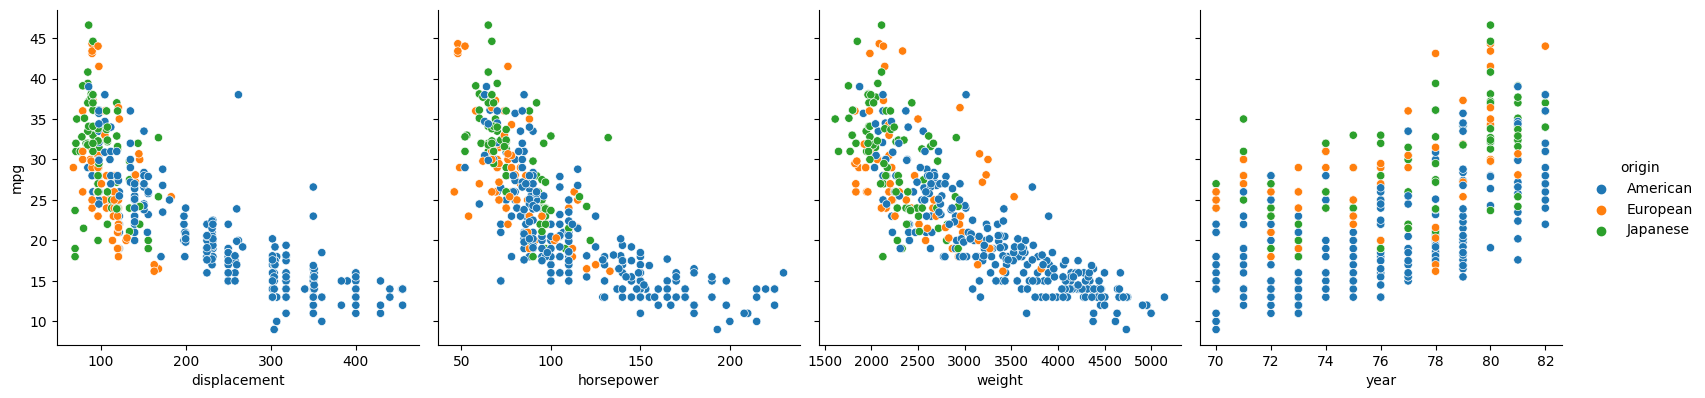

In [ ]:
g = sns.pairplot(auto, hue = 'origin', y_vars=['mpg'], x_vars=['displacement', 'horsepower', 'weight', 'year'], height=4)

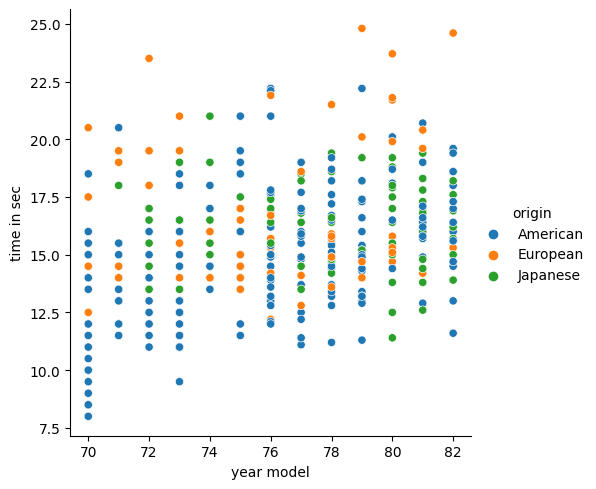

In [ ]:
g = sns.relplot(x = "year", y = 'acceleration', hue = 'origin', data = auto)
g.set(xlabel = "year model", ylabel = "time in sec")
plt.show()

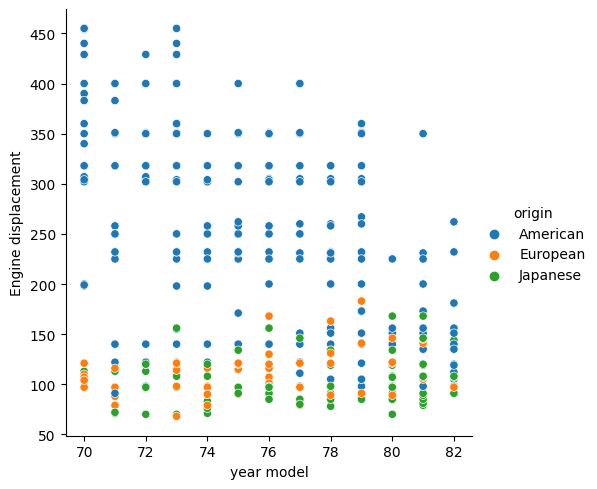

In [ ]:
g = sns.relplot(x = "year", y = 'displacement', hue = 'origin', data = auto)
g.set(xlabel = "year model", ylabel = "Engine displacement")
plt.show()

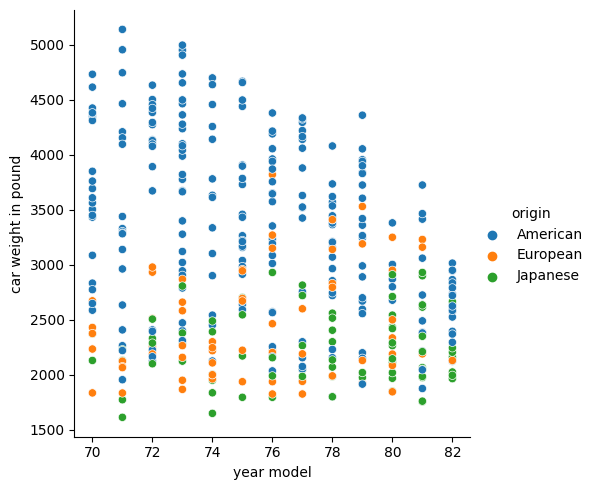

In [ ]:
g = sns.relplot(x = "year", y = 'weight', hue = 'origin', data = auto)
g.set(xlabel = "year model", ylabel = "car weight in pound")
plt.show()

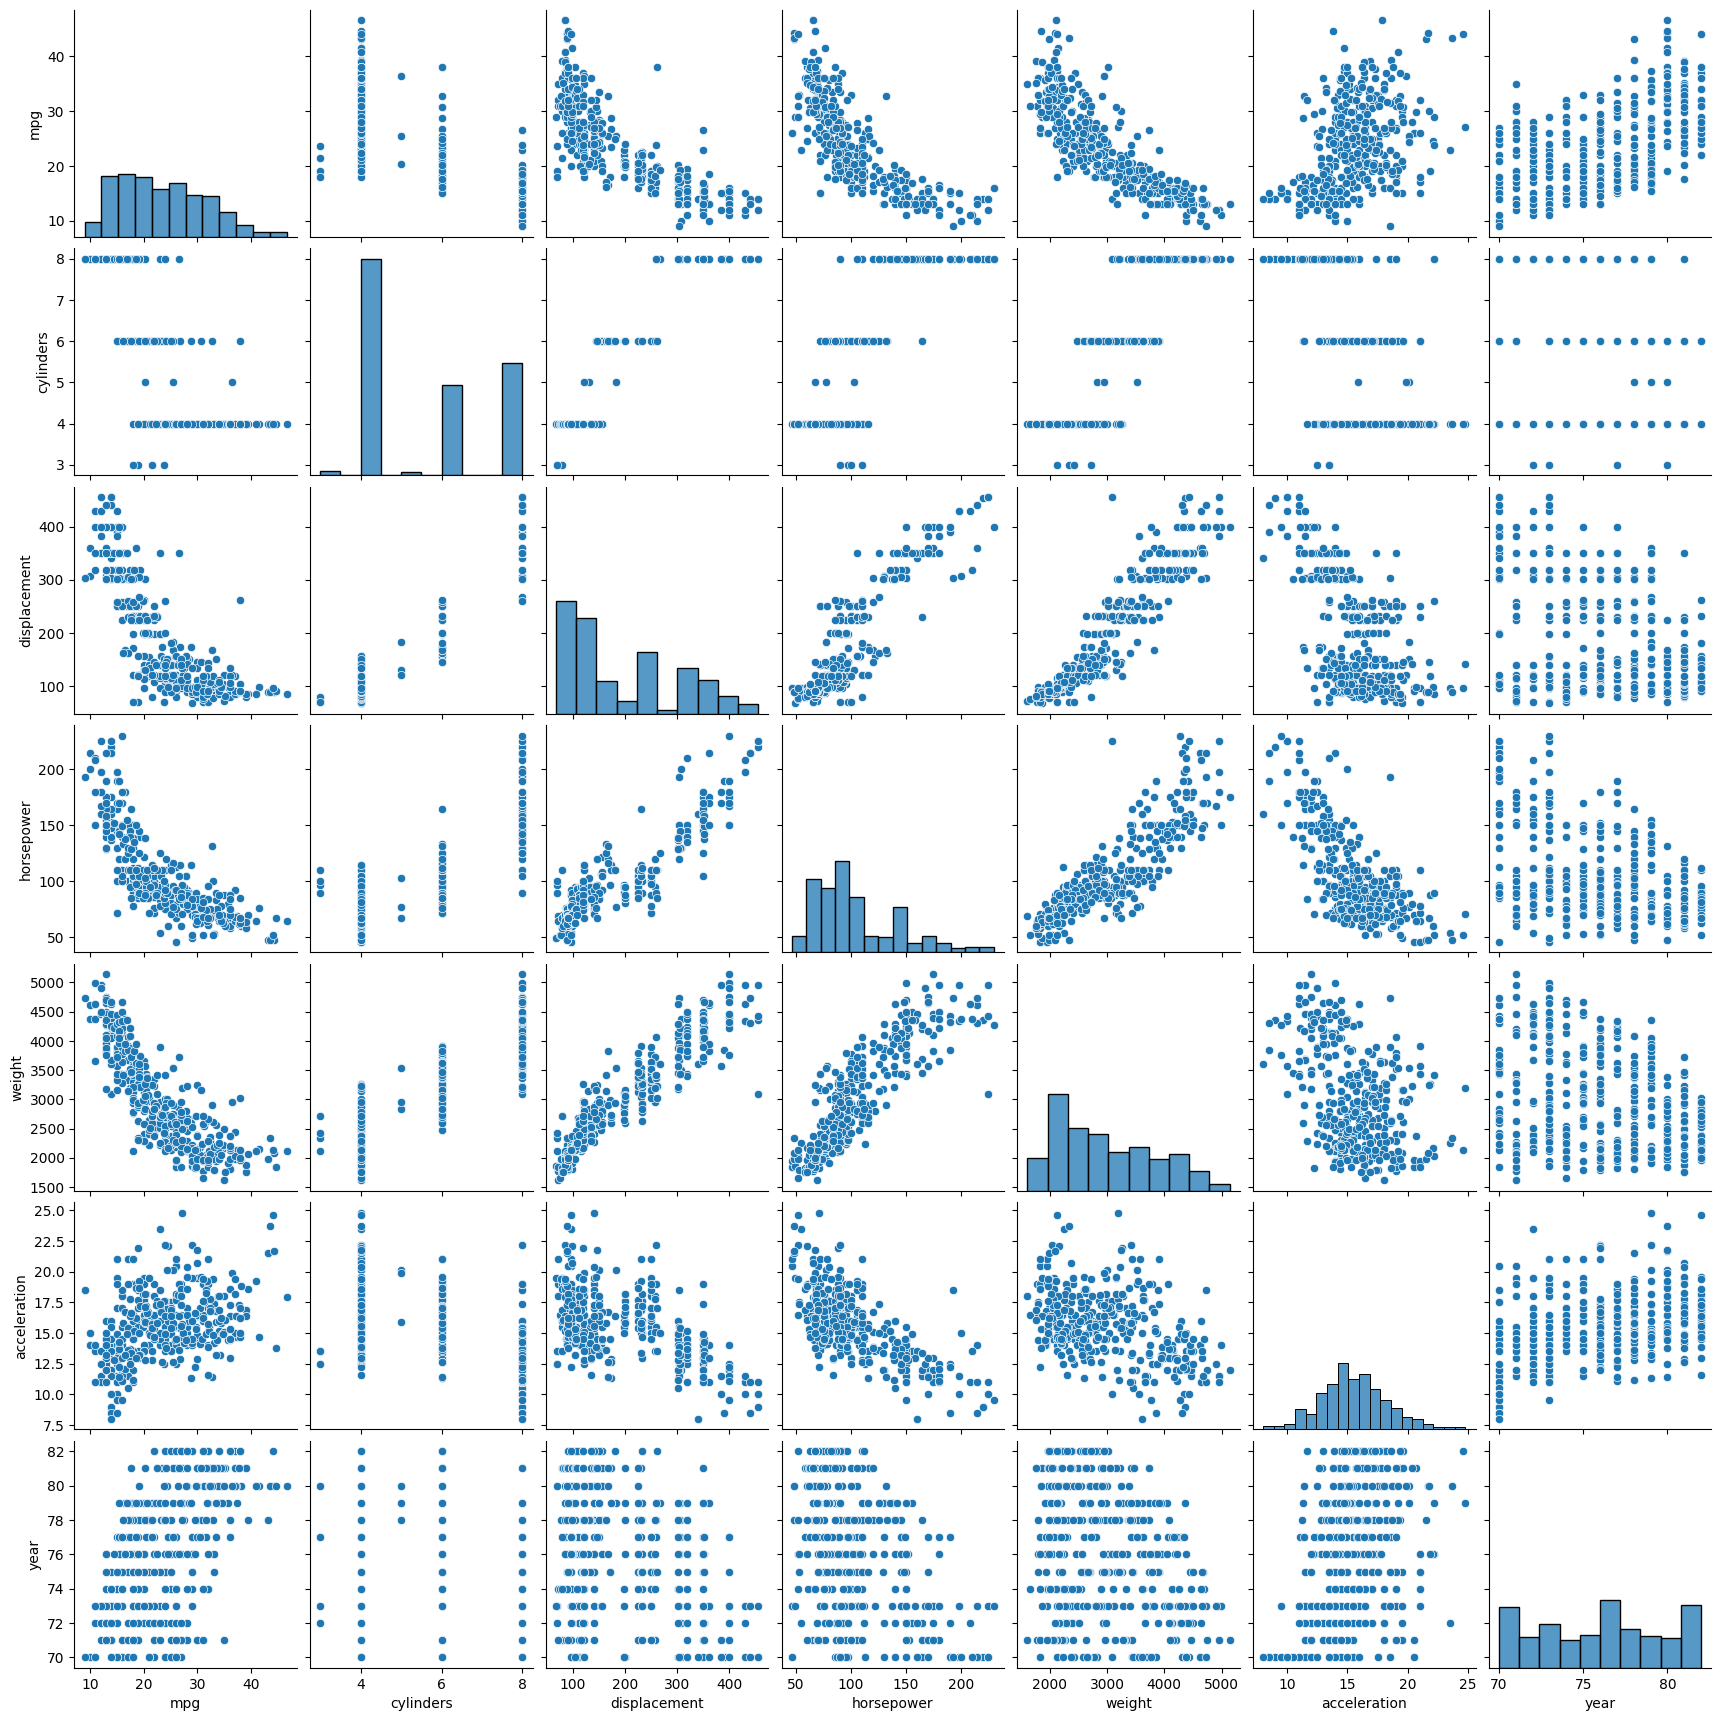

In [ ]:
sns.pairplot(auto)

f)

Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

ANSWER :

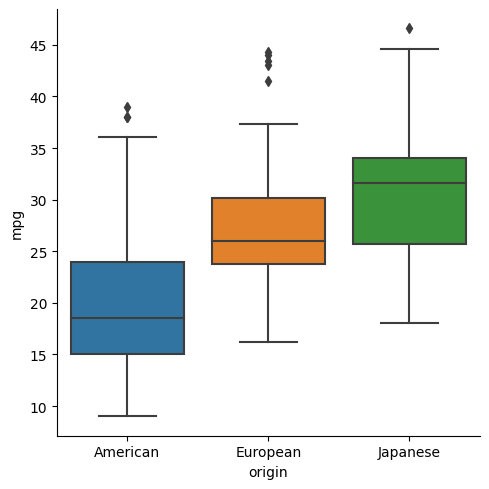

In [ ]:
g = sns.catplot(x = 'origin', y = 'mpg', data = auto, kind = 'box')

The box plot reveals a correlation between a car's country of origin and fuel efficiency, with Japanese cars being the most efficient. This is followed by European cars and then American cars. Japanese cars have engines with lower displacement, producing less power. The average displacement and horsepower for Japanese cars are close to European cars. On average, Japanese cars are 200 pounds lighter than European cars and 1150 pounds lighter than American cars. The combination of engine displacement, horsepower, and car weight affects fuel efficiency, suggesting that the lightweight nature of Japanese cars with small and low-powered engines is the reason for their higher fuel efficiency compared to American and European cars.

In [ ]:
auto.loc[:, 'mpg':"acceleration"].groupby(auto['origin']).agg(['mean','std','min', 'median', 'max']).T

origin                  American     European     Japanese
mpg          mean      20.033469    27.602941    30.450633
             std        6.440384     6.580182     6.090048
             min        9.000000    16.200000    18.000000
             median    18.500000    26.000000    31.600000
             max       39.000000    44.300000    46.600000
cylinders    mean       6.277551     4.161765     4.101266
             std        1.655996     0.506975     0.590414
             min        4.000000     4.000000     3.000000
             median     6.000000     4.000000     4.000000
             max        8.000000     6.000000     6.000000
displacement mean     247.512245   109.632353   102.708861
             std       98.376347    22.693220    23.140126
             min       85.000000    68.000000    70.000000
             median   250.000000   105.000000    97.000000
             max      455.000000   183.000000   168.000000
horsepower   mean     119.048980    80.558824    79.835443
             std       39.897790    20.157871    17.819199
             min       52.000000    46.000000    52.000000
             median   105.000000    76.500000    75.000000
             max      230.000000   133.000000   132.000000
weight       mean    3372.489796  2433.470588  2221.227848
             std      795.346690   491.813867   320.497248
             min     1800.000000  1825.000000  1613.000000
             median  3381.000000  2240.000000  2155.000000
             max     5140.000000  3820.000000  2930.000000
acceleration mean      14.990204    16.794118    16.172152
             std        2.736020     3.087813     1.954937
             min        8.000000    12.200000    11.400000
             median    15.000000    15.600000    16.400000
             max       22.200000    24.800000    21.000000

##10

(a) To begin, load in the Boston data set, which is part of the ISLP
library.

ANSWER :

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv('/content/Boston.csv', index_col=[0])
boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


(b) How many rows are in this data set? How many columns? What
do the rows and columns represent?

ANSWER :

In [ ]:
boston.shape

(506, 13)

The boston data set has 506 rows and 13 columns. each row represented a particular tract of land within the city of Boston. the data set has the following columns:
1. crim: per capita crime rate for the tract
2. zn: Percent of residential land zoned for lots over 25000 square feet per town (constant for all tracts within the same town)
3. indus: Percent of non-retail business acres per town (constant for all tracts within the same town)
4. chas: Dummy variable to indicate whether or not the tract borders the Charles River (1= Borders Charles River, 0= Otherwise)
5. nox: Nitric oxides concentration (in parts per 10 million) per town (constant for all tracts within the same town)
6. rm: Average number of rooms per dwelling in the tract
7. age: Percent of owner-occupied units in the tract built prior to 1940
8. dis: Weighted distance from the tract to five Boston employment center
9. rad: Index of accessibility to radial highways per town (constant for all tracts within the same town)
10. tax : Full-value property tax rate per $10000 per town (constant for all tracts within the same town)
11. ptratio: Pupil-teacher ratio per town (constant for all tracts within the same town)
12. lstat : Percent of tract population designated as lower status
13. medv: Median value of owner-occupied housing in 1000 USD for the tract


(c) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your fndings.

ANSWER :

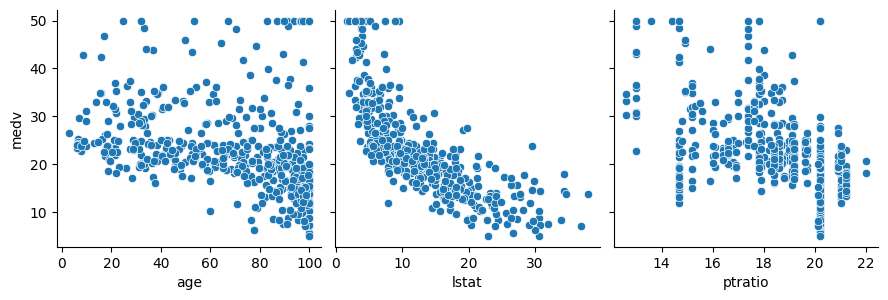

In [ ]:
g = sns.pairplot(boston, x_vars=["age", "lstat", "ptratio"], y_vars=["medv"],height=3)

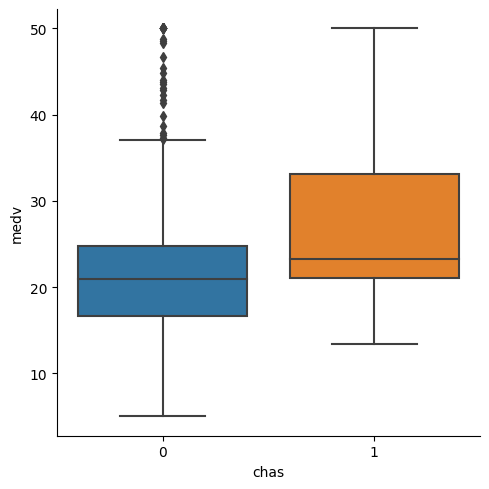

In [ ]:
g = sns.catplot(x = "chas", y = "medv", kind = "box", order = [0, 1], data = boston)

First, we generated some plots to explore the relationship between median home value and a number of non-crime factors. There aren't any especially clear patterns we can discern from these plots aside from the expected result that as a tracts with higher median home values have a greater proportion of lower-status res mice. Also, it appears as if tracts that border the Charles river are a high a slightly higher median home value on average.

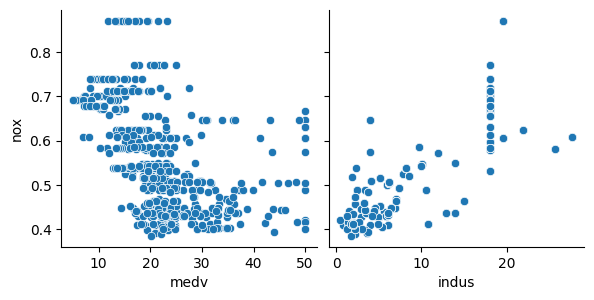

In [ ]:
g = sns.pairplot(boston, x_vars=["medv", "indus"], y_vars=['nox'], height=3)

These two scatter plots in this next group explore factors that might relate to the concentration of nitric oxides. While there isn't a strong relationship, it appears that tracts with higher median home value also weakly tend to have lower concentrations of nitric oxides. There is a much clearer relationship with the percentage of non-retail business acres - tracts with a higher proportion of non-retail business acres tend to have higher concentrations of nitric oxides. The next two plots look at some more factors which might be related to the median home value of a tract.

(d) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

ANSWER :

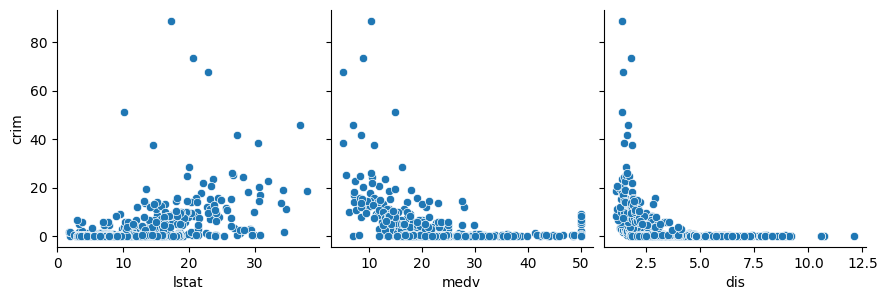

In [ ]:
g = sns.pairplot(boston, x_vars= ["lstat", "medv", "dis"], y_vars=["crim"],height=3)

Based on the three mentioned scatter plots, it seems that there are pretty direct correlations between the crime rate and the median home value, percent of lower status residents, and proximity to Boston employment centers.Tracts with lower home values tend to have higher crime rates, as do tracts which are closer to Boston employment centers.

(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

ANSWER :

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Histogram of pupil-teacher rate')]

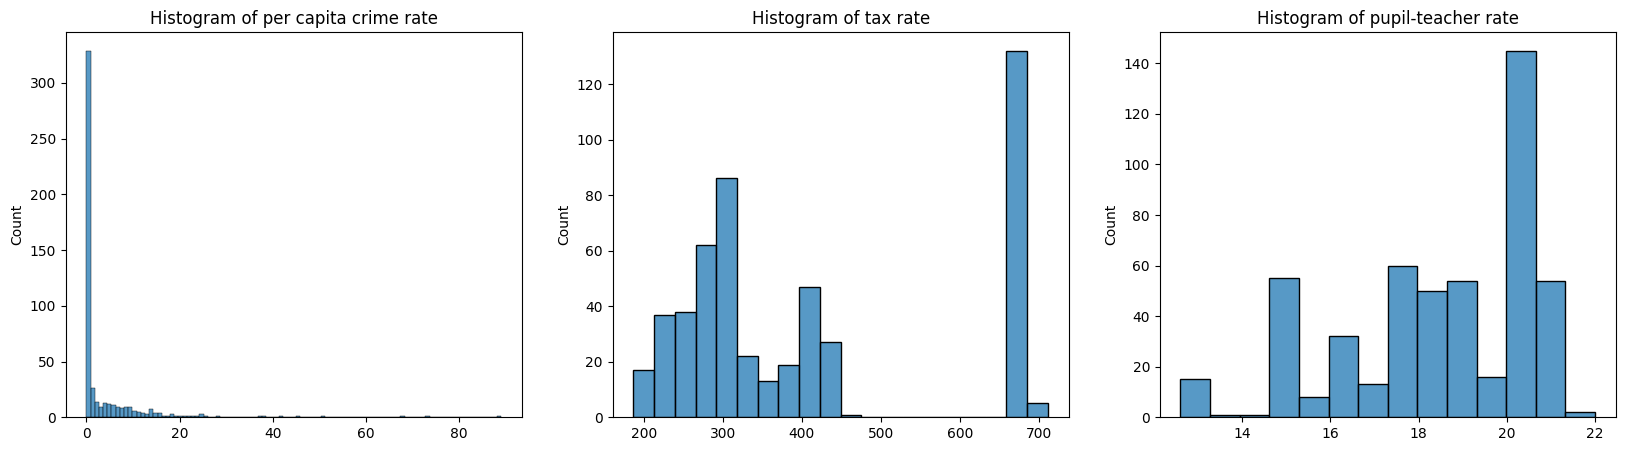

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols= 3, figsize=(20,5))

sns.histplot(boston["crim"], kde = False, ax = axes[0])
axes[0].set(xlabel = "",title = "Histogram of per capita crime rate")

sns.histplot(boston["tax"], bins = 20, kde = False ,ax = axes[1])
axes[1].set(xlabel = "",title = "Histogram of tax rate")

sns.histplot(boston["ptratio"], kde = False ,ax = axes[2])
axes[2].set(xlabel = "",title = "Histogram of pupil-teacher rate")


In [ ]:
boston.loc[:, ["crim", "tax", "ptratio"]].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


Based on the histograms and the numerical summary, there appear to be tracts within Boston which have particularly high crime rates, tax rates, or pupil-teacher ratios. The minimum crime rate is 0.00632, while the maximum is 88.97620, with a median of 0.25651. The minimum tax rate is 187 per $10000,while the maximum is 711, with a median of $330. The minimum pupil-teacher ratio is 12.60 pupils per teacher, while the maximum is 22, with a median of 19.05. Given the median value, the maximum pupil teacher ratio in the data set isn't outrageously high, since about half of the tracts have a ratio of 19 or more

(f) How many of the suburbs in this data set bound the Charles
river?

ANSWER :

In [ ]:
boston["chas"].sum()

35

there is 35 tracts neighbour the charles river.

(g) What is the median pupil-teacher ratio among the towns in this
data set?

ANSWER :

In [ ]:
boston["ptratio"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

the median pupil-teacher ratio among towns in this dataset is 19.05

(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your fndings.

ANSWER :

In [ ]:
min_medv = boston["medv"].min()
boston[boston['medv']== min_medv]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.


ANSWER :

In [ ]:
(boston['rm']>7).sum()

64

In [ ]:
(boston['rm']>8).sum()

13

there are 64 tract which avg more than 7 room per dwelling, and 13 of those tracts which avg more than 8 rooms per dwelling

In [ ]:
boston.loc[boston['rm']>8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


In [ ]:
boston.loc[boston['rm']>8].describe().round(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000,13.0000
mean,0.7188,13.6154,7.0785,0.1538,0.5392,8.3485,71.5385,3.4302,7.4615,325.0769,16.3615,4.3100,44.2000
std,0.9016,26.2981,5.3928,0.3755,0.0924,0.2513,24.6087,1.8840,5.3325,110.9711,2.4106,1.3736,8.0924
min,0.0201,0.0000,2.6800,0.0000,0.4161,8.0340,8.4000,1.8010,2.0000,224.0000,13.0000,2.4700,21.9000
25%,0.3315,0.0000,3.9700,0.0000,0.5040,8.2470,70.4000,2.2885,5.0000,264.0000,14.7000,3.3200,41.7000
50%,0.5201,0.0000,6.2000,0.0000,0.5070,8.2970,78.3000,2.8944,7.0000,307.0000,17.4000,4.1400,48.3000
75%,0.5783,20.0000,6.2000,0.0000,0.6050,8.3980,86.5000,3.6519,8.0000,307.0000,17.4000,5.1200,50.0000
max,3.4743,95.0000,19.5800,1.0000,0.7180,8.7800,93.9000,8.9067,24.0000,666.0000,20.2000,7.4400,50.0000


From the numerical summary, one thing that stands out is that the tracts which average at least eight rooms per dwelling have low crime rates, low concentrations of nitric oxides, low proportions of Black residents (high values of B), and low proportions of lower status residents compared to the overall data set.